In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
input_size=784
hidden_size=500
num_classes=10
num_epochs=5
batch_size=100
learning_rate=0.001

train_dataset=torchvision.datasets.MNIST(root='./data',transform=transforms.ToTensor(),train=True,download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',transform=transforms.ToTensor(),train=False,download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.00MB/s]


In [4]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

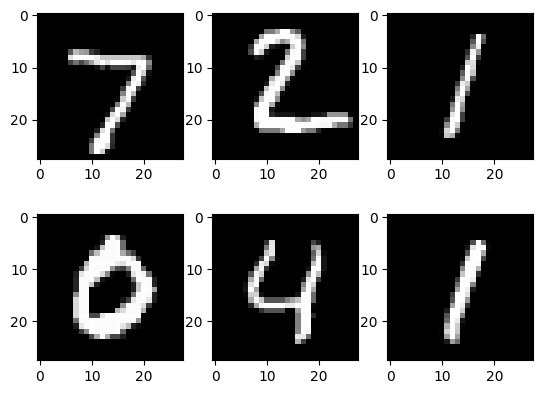

In [22]:
examples=iter(test_loader)
example_data,example_target=next(examples)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0],cmap='gray')
plt.show()

In [6]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out

model=NeuralNet(input_size,hidden_size,num_classes).to(device)

In [7]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [8]:
n_total_steps=len(train_loader)
for epochs in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    outputs=model(images)
    loss=criterion(outputs,labels)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i+1)%100==0:
      print(f'Epoch [{epochs+1}/{num_epochs}], Steps=[{i+1}/{n_total_steps}], Loss= {loss.item():.4f}')

Epoch [1/5], Steps=[100/600], Loss= 0.3475
Epoch [1/5], Steps=[200/600], Loss= 0.2774
Epoch [1/5], Steps=[300/600], Loss= 0.1736
Epoch [1/5], Steps=[400/600], Loss= 0.1785
Epoch [1/5], Steps=[500/600], Loss= 0.1549
Epoch [1/5], Steps=[600/600], Loss= 0.1694
Epoch [2/5], Steps=[100/600], Loss= 0.1406
Epoch [2/5], Steps=[200/600], Loss= 0.2113
Epoch [2/5], Steps=[300/600], Loss= 0.1249
Epoch [2/5], Steps=[400/600], Loss= 0.0606
Epoch [2/5], Steps=[500/600], Loss= 0.0952
Epoch [2/5], Steps=[600/600], Loss= 0.0744
Epoch [3/5], Steps=[100/600], Loss= 0.0464
Epoch [3/5], Steps=[200/600], Loss= 0.0391
Epoch [3/5], Steps=[300/600], Loss= 0.0501
Epoch [3/5], Steps=[400/600], Loss= 0.0772
Epoch [3/5], Steps=[500/600], Loss= 0.1060
Epoch [3/5], Steps=[600/600], Loss= 0.0448
Epoch [4/5], Steps=[100/600], Loss= 0.0706
Epoch [4/5], Steps=[200/600], Loss= 0.0811
Epoch [4/5], Steps=[300/600], Loss= 0.0745
Epoch [4/5], Steps=[400/600], Loss= 0.0148
Epoch [4/5], Steps=[500/600], Loss= 0.0329
Epoch [4/5]

In [9]:
with torch.no_grad():
  n_correct=0
  n_samples=len(test_loader.dataset)

  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    outputs=model(images)

    _,predictions=torch.max(outputs,1)
    n_correct+=(predictions==labels).sum().item()

    acc=n_correct/n_samples
  print(f'Accuracy of the model on {n_samples} test images is: {acc*100} %')

Accuracy of the model on 10000 test images is: 97.97 %


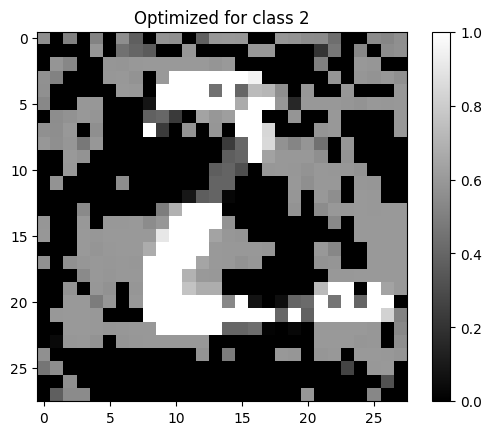

In [28]:

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Assume `model` is a trained network with softmax at the end
model.eval()

# 1. Create a random image with gradients enabled
image = example_data[1][0]
image=image.reshape(-1,28*28)
image.requires_grad = True

# 2. Choose the target class (e.g., '1')
target_class = 2

# 3. Optimizer will update the image
optimizer = torch.optim.Adam([image], lr=0.1)

# 4. Optimize for high confidence in class 1
for i in range(200):
    optimizer.zero_grad()
    logits = model(image)                      # shape: [1, 10]
    probs = F.softmax(logits, dim=1)           # ensure output is prob distribution
    target_prob = probs[0, target_class]       # probability of target class

    loss = -torch.log(target_prob + 1e-8)       # maximize probability of target class
    loss.backward()
    optimizer.step()

    image.data.clamp_(0, 1)  # optional: constrain pixel values to image-like range

# 5. Plot the resulting image
img_np = image.detach().cpu().squeeze().numpy()
img_np=img_np.reshape(28,28)
plt.imshow(img_np, cmap='gray')
plt.title(f'Optimized for class {target_class}')
plt.colorbar()
plt.show()
